In [1]:
import os
import ROOT
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
import scipy.stats as sps
%matplotlib inline

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['image.cmap'] = 'viridis'

In [56]:
path="/home/cristian/Suxess_files/data/run5/"
run=5
pmt=7
filename="Run_%d_PMT_%d_APrate.csv" %(run,pmt)
data = pd.read_csv(path+filename,sep=',')
data=data.sort_values(by='Day', ascending = True)
print(data)

   index       Day  Xe_AP_fit  Xe_AP_nf   error_f  error_nf
1      1  180123.0  -0.000249  0.003829  0.000414  0.000395
0      0  180129.0  -0.000370  0.003195  0.000366  0.000346
2      2  180131.0  -0.000111  0.003930  0.000463  0.000443
3      3  180206.0   0.004081  0.010459  0.001115  0.001103


In [57]:
dates_str=[]
dates = data.Day
print (dates)
for i in range(0,len(data)):
    a = str(int(dates[i]))
    dates_str.append('20'+a)
dates_str=sorted(dates_str)
dates = [pd.to_datetime(d) for d in dates_str]

1    180123.0
0    180129.0
2    180131.0
3    180206.0
Name: Day, dtype: float64


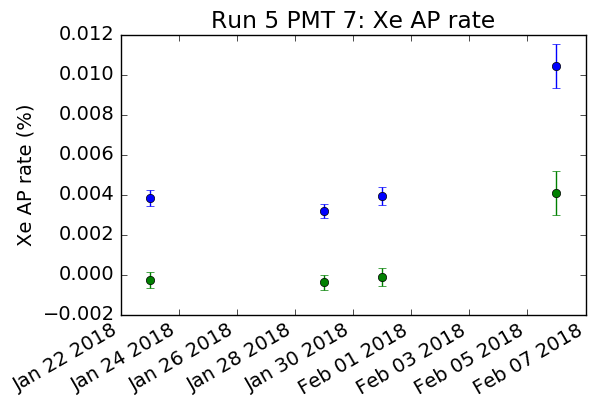

In [59]:

fig, axs = plt.subplots(nrows=1, ncols=1, sharex=False)
ax = axs
ax.errorbar(dates,data.Xe_AP_nf, yerr=data.error_nf,fmt='o')
#ax.axvline(, color='b', linestyle='dashed', linewidth=2, label = 'filling')
ax.set_title('Run %d PMT %d: Xe AP rate (no fit)' %(run,pmt))
ax.set_ylabel('AP rate')
#ax.set_xlabel('Days in Xe')
#ax.set_yscale('log')
ax1=axs
ax1.errorbar(dates,data.Xe_AP_fit, yerr=data.error_f,fmt='o')
#ax1.axvline(10, color='b', linestyle='dashed', linewidth=2, label = 'filling')
ax1.set_title('Run %d PMT %d: Xe AP rate' %(run,pmt))
ax1.set_ylabel('Xe AP rate (%)')
fig.autofmt_xdate()
plt.xlim(pd.to_datetime(str(int(dates_str[0])-1)), pd.to_datetime(str(int(dates_str[-1])+1)) )
#ax.margins(0.2)
#ax1.set_xlabel('Days in Xe')
plt.savefig(path+"/Run_%d_PMT_%d_Xe_APrate" %(run,pmt), transparency=False,dpi=200)
plt.show()
